In [3]:
'''
Ashish Dasu
CS6140 - Machine Learning

Linear Regression: Closed-Form vs Gradient Descent
'''

'\nAshish Dasu\nCS6140 - Machine Learning\n\nLinear Regression: Closed-Form vs Gradient Descent\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def load_data():
    '''Load training and testing data from CSV files.'''
    train_data = pd.read_csv('data/q7-train.csv')
    test_data = pd.read_csv('data/q7-test.csv')
    
    X_train = train_data['x'].values
    y_train = train_data['y'].values
    X_test = test_data['x'].values
    y_test = test_data['y'].values
    
    return X_train, y_train, X_test, y_test

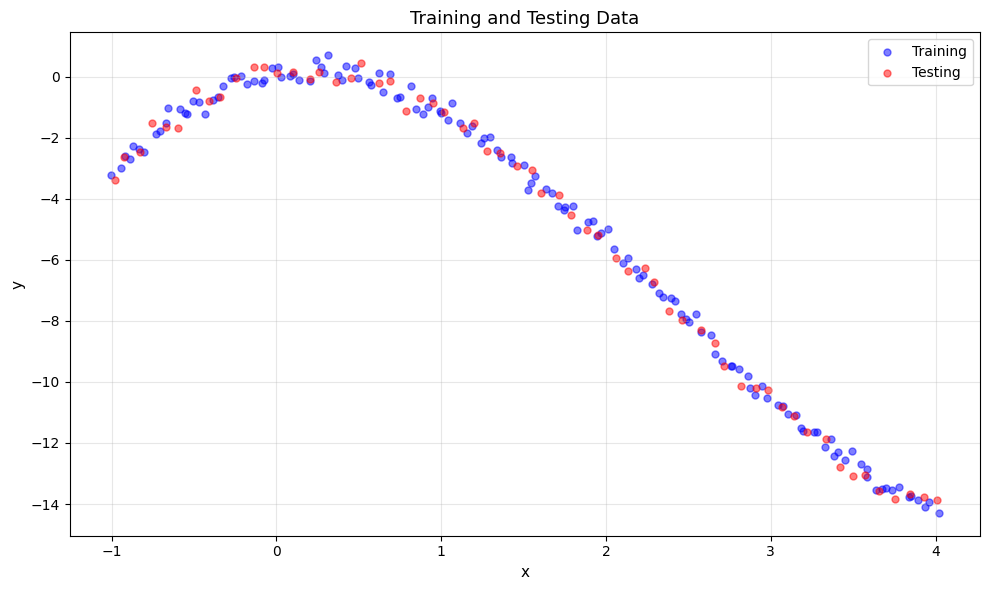

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='blue', alpha=0.5, s=25, label='Training')
plt.scatter(X_test, y_test, c='red', alpha=0.5, s=25, label='Testing')
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.title('Training and Testing Data', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
def construct_design_matrix(X, degree):
    '''
    Build design matrix for polynomial regression.
    Columns are [1, x, x^2, ..., x^degree]
    '''
    N = len(X)
    design_matrix = np.zeros((N, degree + 1))
    
    for i in range(degree + 1):
        design_matrix[:, i] = X ** i
    
    return design_matrix

In [7]:
def compute_mse(y_true, y_pred):
    '''Calculate mean squared error.'''
    return np.mean((y_true - y_pred) ** 2)

In [8]:
def closed_form_solution(X, y):
    '''
    Closed-form solution: theta = (X^T X)^-1 X^T y
    '''
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [9]:
def gradient_descent(X, y, learning_rate=0.01, max_iter=10000, tol=1e-6):
    '''
    Gradient descent implementation.
    Updates: theta <- theta - lr * gradient
    '''
    n_features = X.shape[1]
    theta = np.zeros(n_features)
    
    for iteration in range(max_iter):
        predictions = X @ theta
        gradient = 2 * X.T @ (predictions - y)
        theta_new = theta - learning_rate * gradient
        
        # Check for convergence
        if np.linalg.norm(theta_new - theta) < tol:
            break
        
        theta = theta_new
    
    return theta

In [10]:
def evaluate_model(X_train, y_train, X_test, y_test, theta, method_name):
    '''Compute predictions and MSE for train/test sets.'''
    y_train_pred = X_train @ theta
    y_test_pred = X_test @ theta
    
    train_mse = compute_mse(y_train, y_train_pred)
    test_mse = compute_mse(y_test, y_test_pred)
    
    print(f'\n{method_name}')
    print('~' * 40)
    print(f'Theta: {theta}')
    print(f'Train MSE: {train_mse:.6f}')
    print(f'Test MSE:  {test_mse:.6f}')
    
    return {
        'theta': theta,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

In [11]:
def compare_methods(theta_cf, theta_gd):
    '''Compare coefficient differences between methods.'''
    print('\nMethod Comparison')
    print('~' * 40)
    diff = np.abs(theta_cf - theta_gd)
    print(f'Theta differences: {diff}')
    print(f'Max difference: {np.max(diff):.8f}')

In [12]:
def run_regression(X_train, y_train, X_test, y_test, degree):
    '''
    Run both closed-form and gradient descent for given polynomial degree.
    Returns results from both methods.
    '''
    print(f'\n{"~"*60}')
    print(f'POLYNOMIAL DEGREE {degree}')
    print(f'{"~"*60}')
    
    # Construct design matrices
    X_train_design = construct_design_matrix(X_train, degree)
    X_test_design = construct_design_matrix(X_test, degree)
    
    # Closed-form solution
    theta_cf = closed_form_solution(X_train_design, y_train)
    results_cf = evaluate_model(X_train_design, y_train, X_test_design, y_test, 
                                 theta_cf, 'Closed-Form Solution')
    
    # Gradient descent with adaptive learning rate
    lr = 0.0001 / (degree ** 3)
    max_iter = 50000 * degree
    theta_gd = gradient_descent(X_train_design, y_train, learning_rate=lr, max_iter=max_iter)
    results_gd = evaluate_model(X_train_design, y_train, X_test_design, y_test,
                                 theta_gd, 'Gradient Descent')
    
    # Compare results
    compare_methods(theta_cf, theta_gd)
    
    return {
        'degree': degree,
        'theta_cf': theta_cf,
        'theta_gd': theta_gd,
        'results_cf': results_cf,
        'results_gd': results_gd
    }

In [13]:
def plot_fits(X_train, y_train, X_test, y_test, results):
    '''Plot data and fitted polynomial curves.'''
    degree = results['degree']
    
    plt.figure(figsize=(10, 6))
    
    # Data points
    plt.scatter(X_train, y_train, c='blue', alpha=0.5, s=25, label='Training')
    plt.scatter(X_test, y_test, c='red', alpha=0.5, s=25, label='Testing')
    
    # Fitted curves
    x_range = np.linspace(X_train.min(), X_train.max(), 200)
    X_range_design = construct_design_matrix(x_range, degree)
    
    y_cf = X_range_design @ results['theta_cf']
    y_gd = X_range_design @ results['theta_gd']
    
    plt.plot(x_range, y_cf, 'g-', linewidth=2, label='Closed-Form', alpha=0.8)
    plt.plot(x_range, y_gd, 'm--', linewidth=2, label='Gradient Descent', alpha=0.8)
    
    plt.xlabel('x', fontsize=11)
    plt.ylabel('y', fontsize=11)
    plt.title(f'Polynomial Regression - Degree {degree}', fontsize=13)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Training samples: 140
Testing samples: 60

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
POLYNOMIAL DEGREE 1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Closed-Form Solution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta: [-0.51002151 -3.01363716]
Train MSE: 3.751409
Test MSE:  3.957987

Gradient Descent
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta: [-0.51009842 -3.01360785]
Train MSE: 3.751409
Test MSE:  3.957982

Method Comparison
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta differences: [7.69106921e-05 2.93077842e-05]
Max difference: 0.00007691


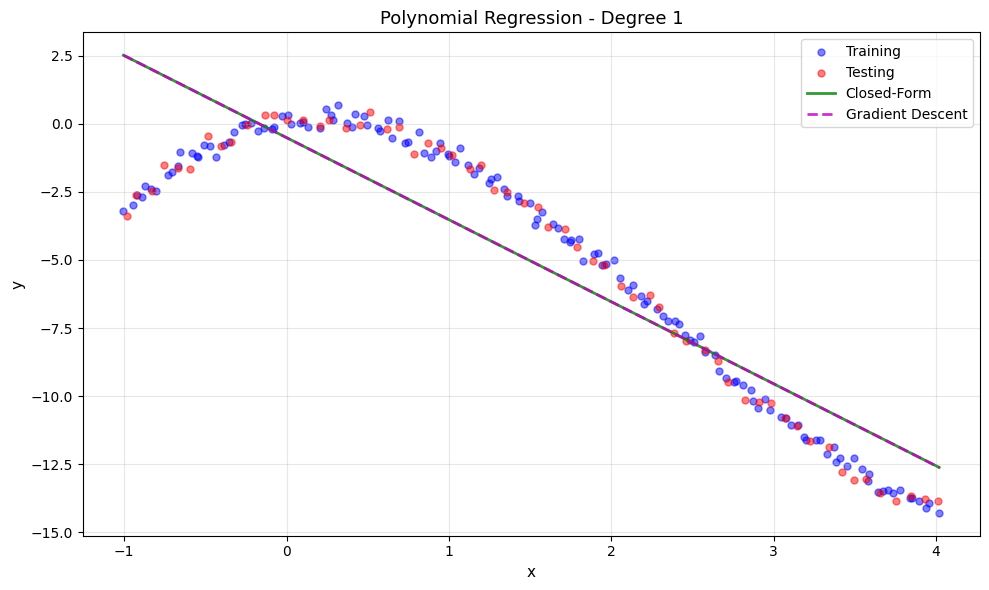


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
POLYNOMIAL DEGREE 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Closed-Form Solution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta: [-0.63218176 -0.26115908 -0.91780215]
Train MSE: 0.735923
Test MSE:  0.870267

Gradient Descent
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta: [-0.63170562 -0.26205221 -0.91757418]
Train MSE: 0.735923
Test MSE:  0.870264

Method Comparison
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta differences: [0.00047615 0.00089313 0.00022797]
Max difference: 0.00089313


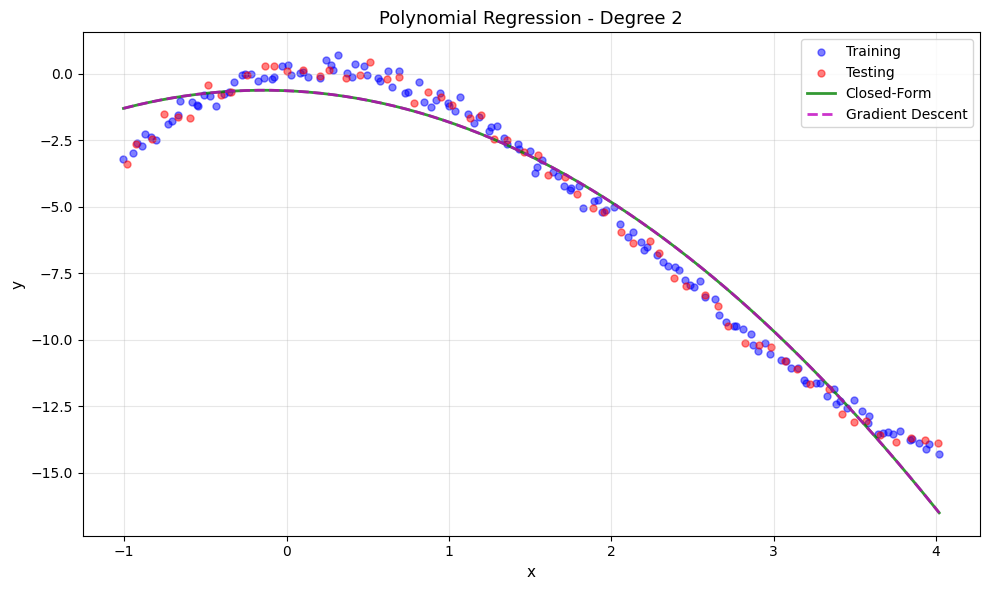


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
POLYNOMIAL DEGREE 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Closed-Form Solution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta: [ 0.17123184  0.75250673 -2.46554158  0.34378387]
Train MSE: 0.047360
Test MSE:  0.066006

Gradient Descent
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta: [ 0.16893114  0.74744895 -2.46050397  0.34282236]
Train MSE: 0.047367
Test MSE:  0.066138

Method Comparison
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Theta differences: [0.0023007  0.00505777 0.00503761 0.00096151]
Max difference: 0.00505777


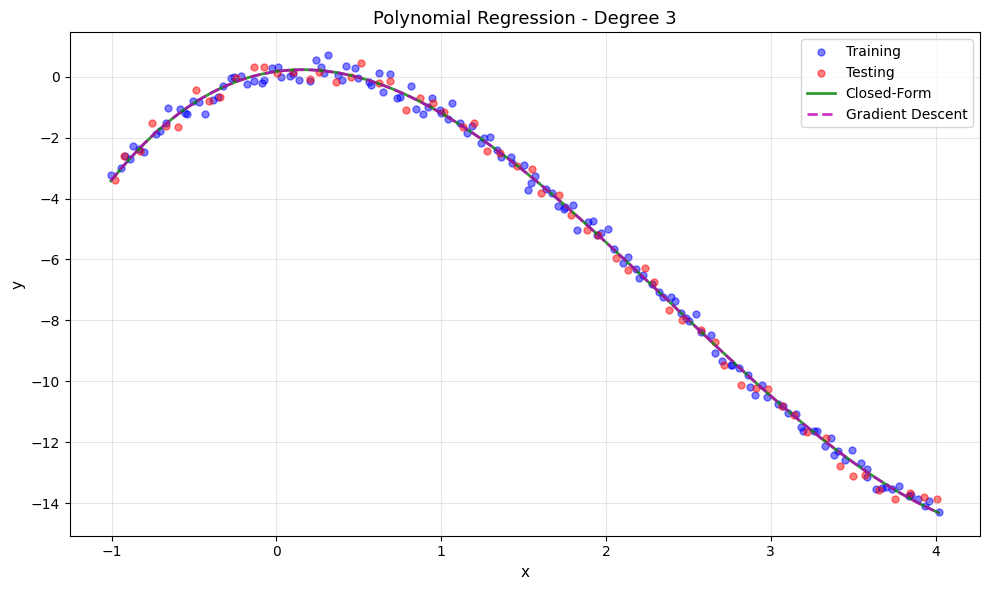

In [14]:
if __name__ == '__main__':
    # Load data
    X_train, y_train, X_test, y_test = load_data()
    print(f'Training samples: {len(X_train)}')
    print(f'Testing samples: {len(X_test)}')
    
    # Run regression for degrees 1, 2, 3
    for degree in [1, 2, 3]:
        results = run_regression(X_train, y_train, X_test, y_test, degree)
        plot_fits(X_train, y_train, X_test, y_test, results)